In [1]:
import pandas as pd
import numpy as np
from datetime import date

In [2]:
df=pd.read_csv('mergeddata.csv', parse_dates=['date'])

In [3]:
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,location_key,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-11-26,26,11,2020,200.0,12.0,Afghanistan,AF,AFG,38041757.0,Asia,7.341932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-25,25,11,2020,185.0,13.0,Afghanistan,AF,AFG,38041757.0,Asia,7.199983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-24,24,11,2020,246.0,17.0,Afghanistan,AF,AFG,38041757.0,Asia,6.713675,10.222222,5.722222,13.277778,16.002,NaN,7.222222,81.648174
3,2020-11-23,23,11,2020,252.0,8.0,Afghanistan,AF,AFG,38041757.0,Asia,6.655844,10.333333,8.000000,12.722222,8.128,NaN,8.777778,90.083356
4,2020-11-22,22,11,2020,154.0,12.0,Afghanistan,AF,AFG,38041757.0,Asia,6.203709,12.555556,4.888889,19.222222,0.000,NaN,-0.166667,41.566186


In [4]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

### USA ONLY

In [5]:
USA_only = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']

In [6]:
USA_only=USA_only[['date','cases']]

In [7]:
USA_only.head()

,date,cases
55383,2020-11-26,186589.0
55384,2020-11-25,170293.0
55385,2020-11-24,173963.0
55386,2020-11-23,157471.0
55387,2020-11-22,175494.0


In [8]:
USA_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 55383 to 55714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


<Axes: >

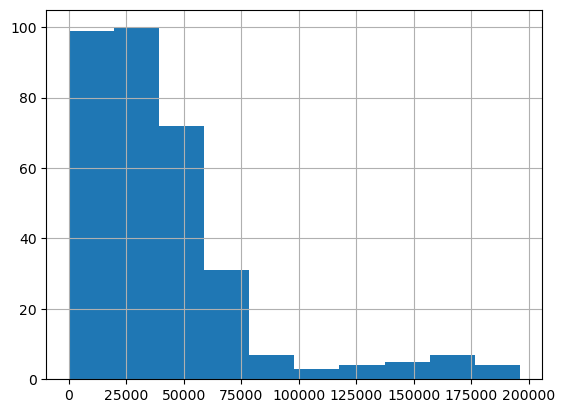

In [9]:
USA_only['cases'].hist()

In [10]:
CasesNorm = np.sqrt(USA_only['cases'])   #Normalizing the data

<Axes: >

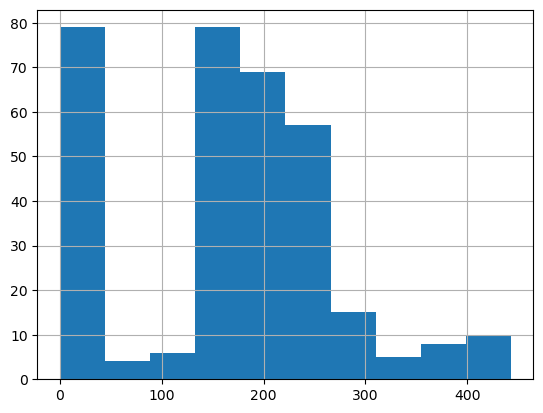

In [11]:
CasesNorm.hist()

In [12]:
USA_only['cases']= CasesNorm

In [13]:
USA_only.head()

,date,cases
55383,2020-11-26,431.959489
55384,2020-11-25,412.665724
55385,2020-11-24,417.088720
55386,2020-11-23,396.826158
55387,2020-11-22,418.920040


In [14]:
USA_only=USA_only.groupby('date').sum()

In [15]:
USA_only

,cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-11-22,418.920040
2020-11-23,396.826158
2020-11-24,417.088720


In [16]:
USA_only=USA_only.resample(rule='M').sum()

In [17]:
USA_only.head()

,cases
date,
2019-12-31,0.000000
2020-01-31,4.732051
2020-02-29,23.232570
2020-03-31,1659.239191
2020-04-30,5101.677431


<Axes: xlabel='date'>

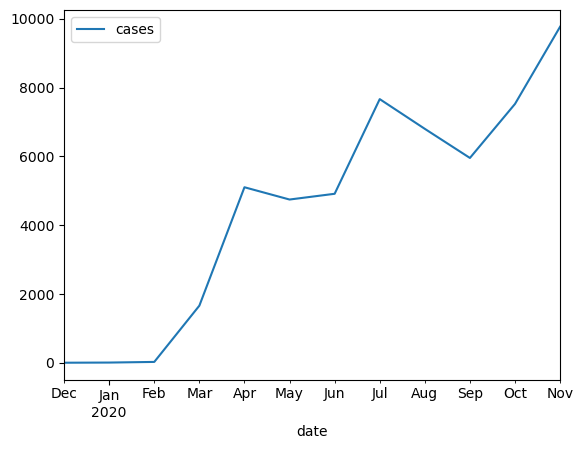

In [18]:
USA_only.plot()

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


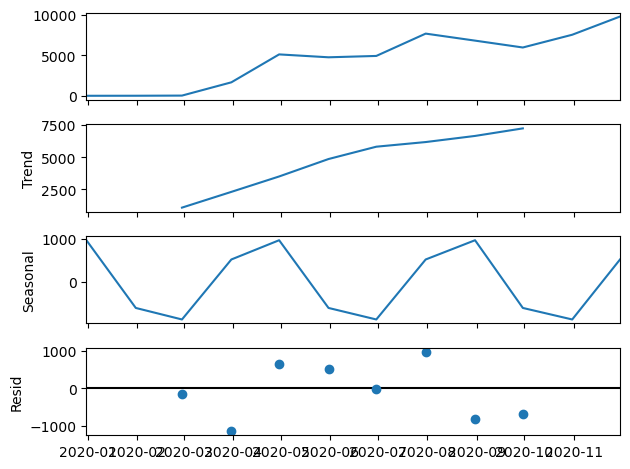

In [20]:
seasonal_decompose(USA_only, model='additive', period=4).plot();

In [21]:
len(USA_only)

12

In [22]:
train=USA_only[:8]
test=USA_only[8:]

In [23]:
train

,cases
date,
2019-12-31,0.000000
2020-01-31,4.732051
2020-02-29,23.232570
2020-03-31,1659.239191
2020-04-30,5101.677431
2020-05-31,4744.636568
2020-06-30,4911.766024
2020-07-31,7663.958398


In [24]:
test

,cases
date,
2020-08-31,6799.734057
2020-09-30,5953.296461
2020-10-31,7524.203787
2020-11-30,9768.832127


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [26]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

In [27]:

test_pred=hwmodel.forecast(4)


In [28]:

test_pred

2020-08-31     9692.465110
2020-09-30     9593.955332
2020-10-31     9780.667594
2020-11-30    11900.272341
Freq: M, dtype: float64

<Axes: xlabel='date'>

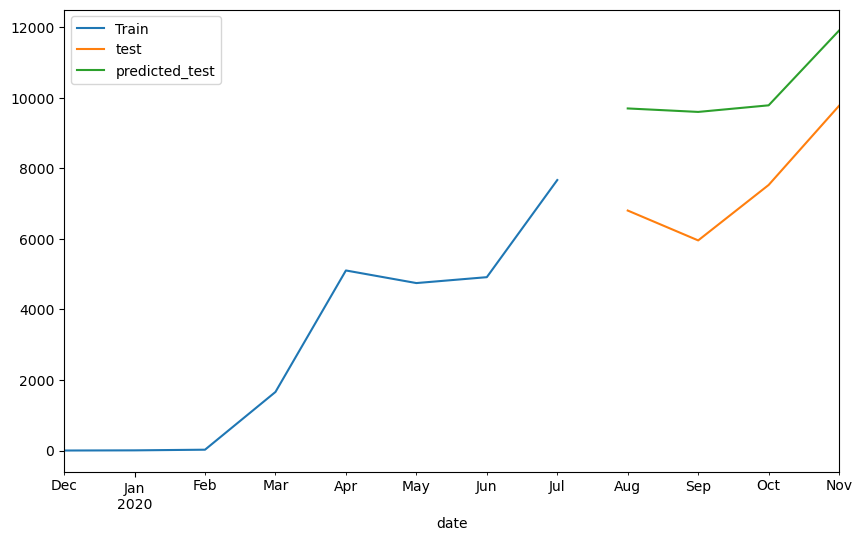

In [29]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [30]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
np.sqrt(mean_squared_error(test, test_pred))

2795.396047858082

In [32]:
USA_only.cases.mean(), np.sqrt(USA_only.cases.var())

(4512.942388735141, 3350.3878624379054)

In [33]:
final_model=ExponentialSmoothing(USA_only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

In [34]:
pred=final_model.forecast(6)

In [35]:
pred

2020-12-31    10419.217321
2021-01-31    10065.954962
2021-02-28    10686.764188
2021-03-31    12811.737447
2021-04-30    13610.225106
2021-05-31    13256.962746
Freq: M, dtype: float64

<Axes: xlabel='date'>

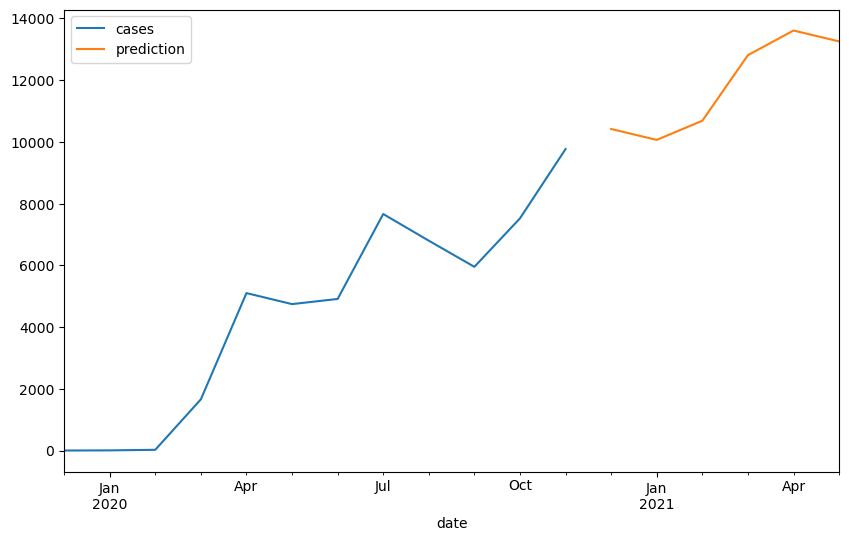

In [36]:
USA_only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### INDIA ONLY

In [37]:
India_only = df.loc[df['countriesAndTerritories'] == 'India']

In [38]:
India_only=India_only[['date','cases']]

In [39]:
India_only.head()

,date,cases
25107,2020-11-26,44489.0
25108,2020-11-25,44376.0
25109,2020-11-24,37975.0
25110,2020-11-23,44059.0
25111,2020-11-22,45209.0


In [40]:
India_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 25107 to 25437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    331 non-null    datetime64[ns]
 1   cases   331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


<Axes: >

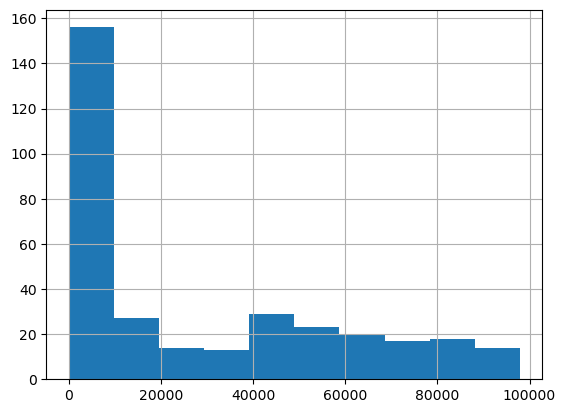

In [41]:
India_only['cases'].hist()

In [42]:
IncasesNorm = np.sqrt(India_only['cases'])

In [43]:
India_only['cases']= IncasesNorm 

<Axes: >

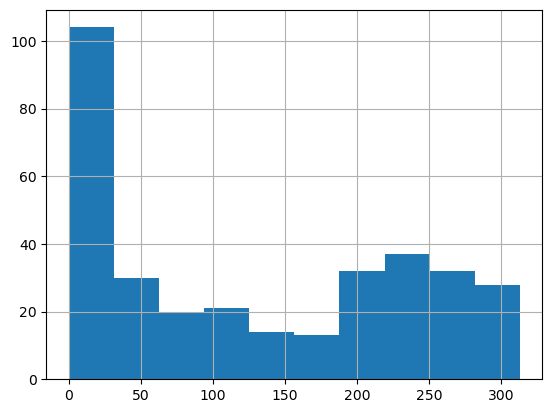

In [44]:
India_only['cases'].hist()

In [45]:
India_only

,date,cases
25107,2020-11-26,210.924157
25108,2020-11-25,210.656118
25109,2020-11-24,194.871753
25110,2020-11-23,209.902358
25111,2020-11-22,212.624081
...,...,...
25433,2020-01-04,0.000000
25434,2020-01-03,0.000000
25435,2020-01-02,0.000000
25436,2020-01-01,0.000000


In [46]:
India_only=India_only.groupby('date').sum()

In [47]:
India_only

,cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-11-22,212.624081
2020-11-23,209.902358
2020-11-24,194.871753


In [48]:
India_only=India_only.resample(rule='M').sum()

In [49]:
India_only.head()

,cases
date,
2019-12-31,0.000000
2020-01-31,1.000000
2020-02-29,2.000000
2020-03-31,155.602262
2020-04-30,947.036608


<Axes: xlabel='date'>

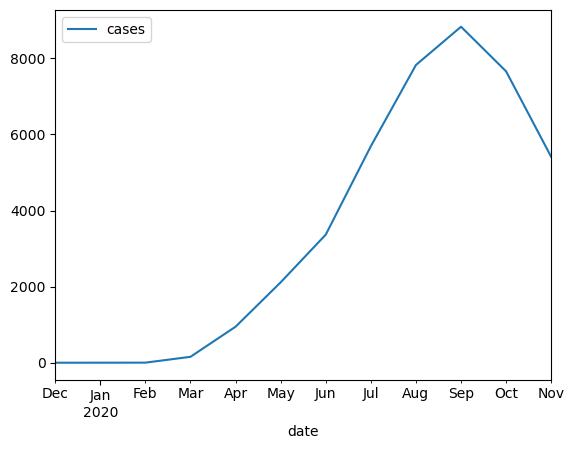

In [50]:
India_only.plot()

In [51]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


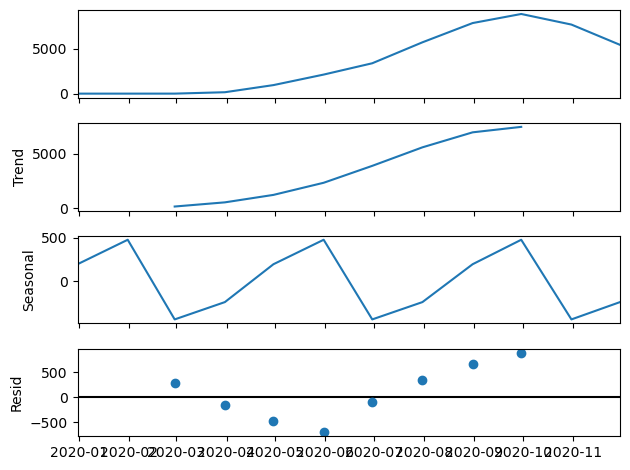

In [52]:
seasonal_decompose(India_only, model='additive', period=4).plot();

In [53]:
len(India_only)

12

In [54]:
train=India_only[:8]
test=India_only[8:]

In [55]:
train

,cases
date,
2019-12-31,0.000000
2020-01-31,1.000000
2020-02-29,2.000000
2020-03-31,155.602262
2020-04-30,947.036608
2020-05-31,2113.072985
2020-06-30,3366.835891
2020-07-31,5690.567965


In [56]:
test

,cases
date,
2020-08-31,7824.797363
2020-09-30,8830.855627
2020-10-31,7656.800665
2020-11-30,5409.017265


In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [58]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

In [59]:

test_pred=hwmodel.forecast(4)


In [60]:

test_pred

2020-08-31     7632.434590
2020-09-30     9760.621661
2020-10-31    11684.683446
2020-11-30    13891.401543
Freq: M, dtype: float64

<Axes: xlabel='date'>

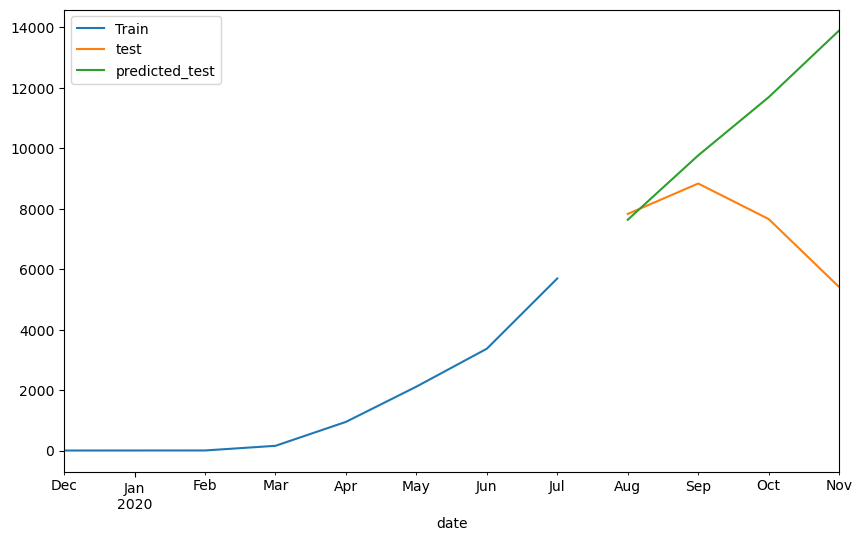

In [61]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [62]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
np.sqrt(mean_squared_error(test, test_pred))

4719.008133065164

In [64]:
India_only.cases.mean(), np.sqrt(India_only.cases.var())

(3499.7988858702042, 3427.3862648852023)

In [65]:
final_model=ExponentialSmoothing(India_only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

In [66]:
pred=final_model.forecast(5)

In [67]:
pred

2020-12-31    3594.101433
2021-01-31    1702.535343
2021-02-28    -746.298846
2021-03-31   -2989.637869
2021-04-30   -4810.421806
Freq: M, dtype: float64

<Axes: xlabel='date'>

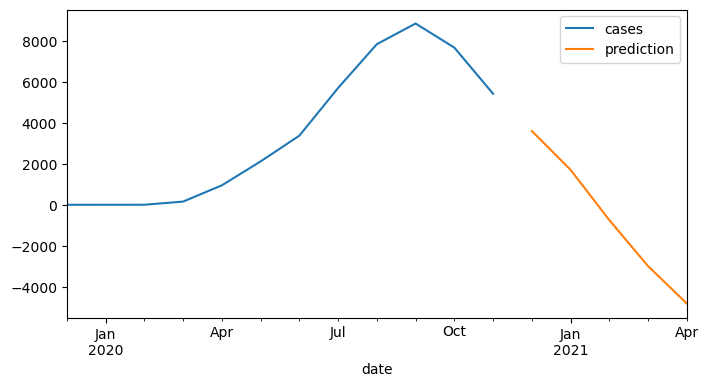

In [68]:
India_only['cases'].plot(legend=True, label='cases', figsize=(8,4))
pred.plot(legend=True, label='prediction')

### BRAZIL ONLY

In [69]:
Brazil_Only = df.loc[df['countriesAndTerritories'] == 'Brazil']

In [70]:
Brazil_Only=Brazil_Only[['date','cases']]

In [71]:
Brazil_Only.head()

,date,cases
7505,2020-11-26,47898.0
7506,2020-11-25,31100.0
7507,2020-11-24,16207.0
7508,2020-11-23,18615.0
7509,2020-11-22,32622.0


In [72]:
Brazil_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 7505 to 7836
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


<Axes: >

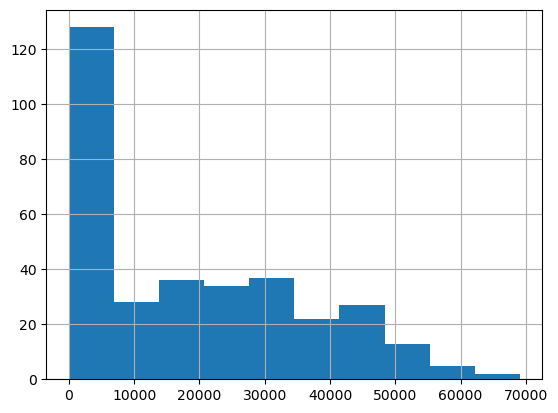

In [73]:
Brazil_Only['cases'].hist()

In [74]:
BrcasesNorm = np.sqrt(Brazil_Only['cases'])

In [75]:
Brazil_Only['cases']= BrcasesNorm 

<Axes: >

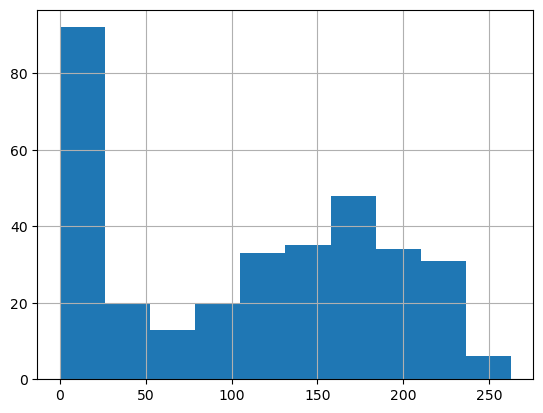

In [76]:
Brazil_Only['cases'].hist()

In [77]:
Brazil_Only['cases']

7505    218.856117
7506    176.351921
7507    127.306716
7508    136.436799
7509    180.615614
           ...    
7832      0.000000
7833      0.000000
7834      0.000000
7835      0.000000
7836      0.000000
Name: cases, Length: 332, dtype: float64

In [78]:
Brazil_Only=Brazil_Only.groupby('date').sum()

In [79]:
Brazil_Only

,cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-11-22,180.615614
2020-11-23,136.436799
2020-11-24,127.306716


In [80]:
Brazil_Only=Brazil_Only.resample(rule='M').sum()

In [81]:
Brazil_Only.head()

,cases
date,
2019-12-31,0.000000
2020-01-31,0.000000
2020-02-29,1.000000
2020-03-31,286.232026
2020-04-30,1427.999524


<Axes: xlabel='date'>

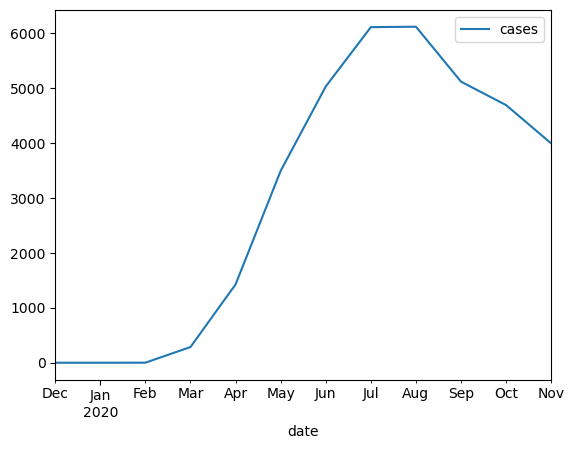

In [82]:
Brazil_Only.plot()

In [83]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


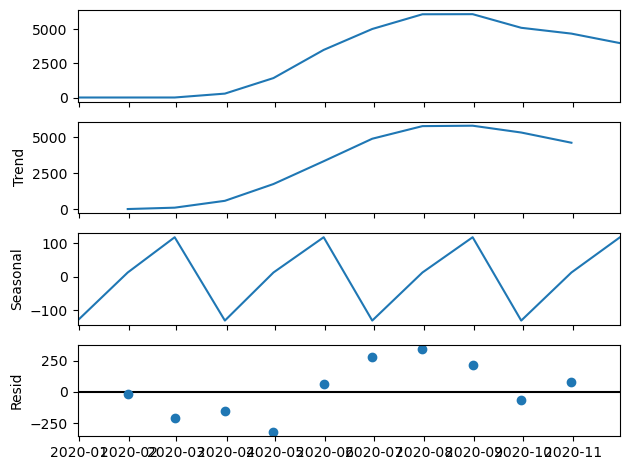

In [84]:
seasonal_decompose(Brazil_Only, model='additive', period=3).plot();

In [ ]:
len(Brazil_Only)

In [ ]:
train=Brazil_Only[:8]
test=Brazil_Only[8:]

In [ ]:
train

In [ ]:
test

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [85]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', damped_trend=True, seasonal_periods=4).fit()

In [86]:

test_pred=hwmodel.forecast(4)


In [87]:

test_pred

2020-08-31     7808.354692
2020-09-30     9870.004273
2020-10-31    11676.355980
2020-11-30    13803.105380
Freq: M, dtype: float64

<Axes: xlabel='date'>

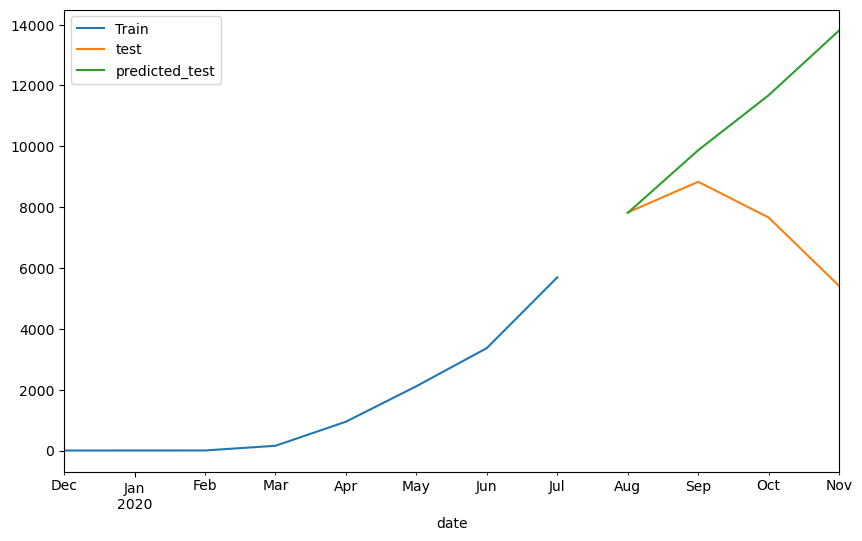

In [88]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [89]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [90]:
np.sqrt(mean_squared_error(test, test_pred))

4682.350918252527

In [91]:
Brazil_Only.cases.mean(), np.sqrt(India_only.cases.var())

(3024.8047933873972, 3427.3862648852023)

In [94]:
final_model=ExponentialSmoothing(Brazil_Only.cases, trend='add', damped_trend=True, seasonal='add', seasonal_periods=4).fit()

In [95]:
pred=final_model.forecast(5)

In [96]:
pred

2020-12-31    3151.704466
2021-01-31    2458.296537
2021-02-28    1884.113327
2021-03-31    1236.862343
2021-04-30     415.254694
Freq: M, dtype: float64

<Axes: xlabel='date'>

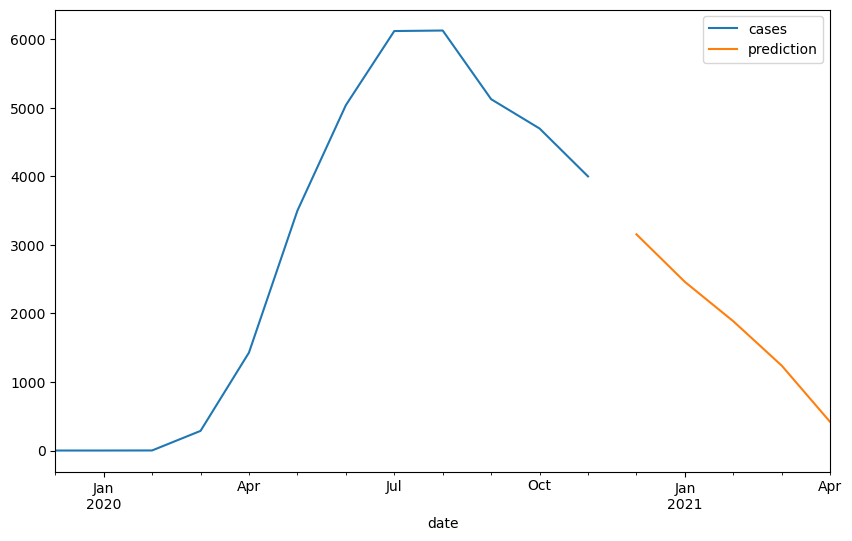

In [97]:
Brazil_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### RUSSIA ONLY

In [98]:
 Russia_Only = df.loc[df['countriesAndTerritories'] == 'Russia']

In [99]:
Russia_Only=Russia_Only[['date','cases']]

In [100]:
Russia_Only.head()

,date,cases
44057,2020-11-26,25487.0
44058,2020-11-25,23675.0
44059,2020-11-24,24326.0
44060,2020-11-23,25173.0
44061,2020-11-22,24581.0


In [101]:
Russia_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 44057 to 44388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


<Axes: >

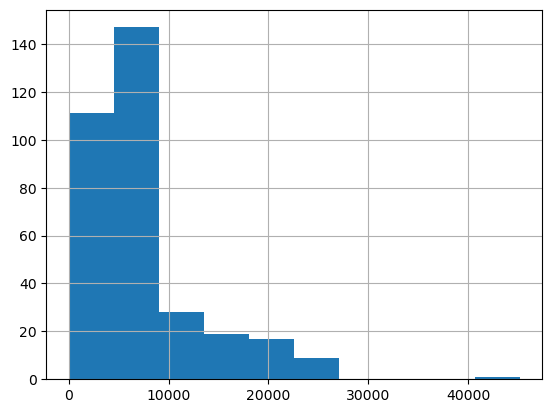

In [102]:
Russia_Only['cases'].hist()

In [103]:
RucasesNorm = np.sqrt(Russia_Only['cases'])

In [104]:
Russia_Only['cases']= RucasesNorm 

<Axes: >

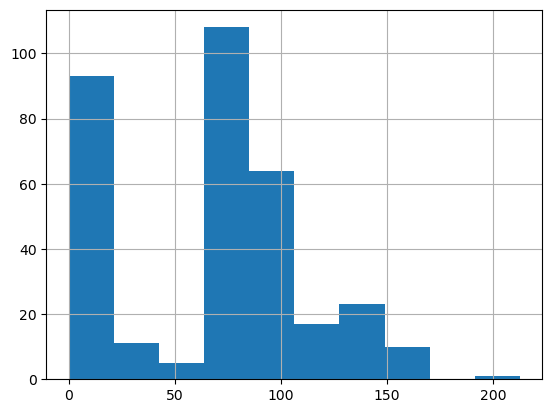

In [105]:
Russia_Only['cases'].hist()

In [106]:
Russia_Only=Russia_Only.groupby('date').sum()

In [107]:
Russia_Only

,cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-11-22,156.783290
2020-11-23,158.660014
2020-11-24,155.967945


In [108]:
Russia_Only=Russia_Only.resample(rule='M').sum()

In [109]:
Russia_Only.head()

,cases
date,
2019-12-31,0.000000
2020-01-31,0.000000
2020-02-29,1.414214
2020-03-31,170.770837
2020-04-30,1594.177343


<Axes: xlabel='date'>

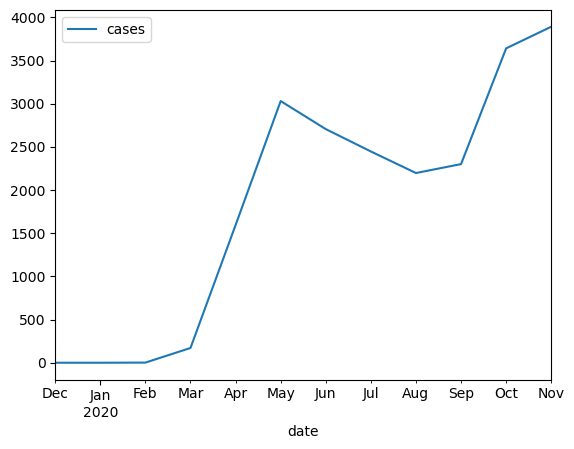

In [110]:
Russia_Only.plot()

In [111]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


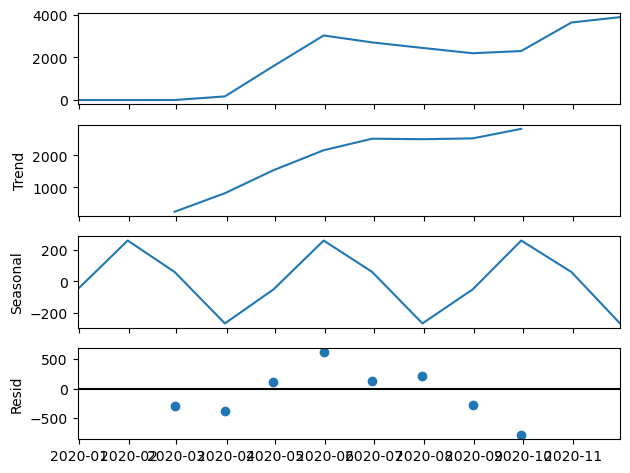

In [164]:
seasonal_decompose(Russia_Only, model='additive', period=4).plot();

In [165]:
len(Russia_Only)

12

In [166]:
train=Russia_Only[:8]
test=Russia_Only[8:]

In [167]:
train

,cases
date,
2019-12-31,0.000000
2020-01-31,0.000000
2020-02-29,1.414214
2020-03-31,170.770837
2020-04-30,1594.177343
2020-05-31,3030.373197
2020-06-30,2705.572091
2020-07-31,2446.776211


In [168]:
test

,cases
date,
2020-08-31,2196.984828
2020-09-30,2300.301656
2020-10-31,3640.741187
2020-11-30,3891.381221


In [169]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [170]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

In [171]:

test_pred=hwmodel.forecast(4)


In [172]:

test_pred

2020-08-31    4223.169991
2020-09-30    4979.241919
2020-10-31    4771.936180
2020-11-30    4766.626887
Freq: M, dtype: float64

<Axes: xlabel='date'>

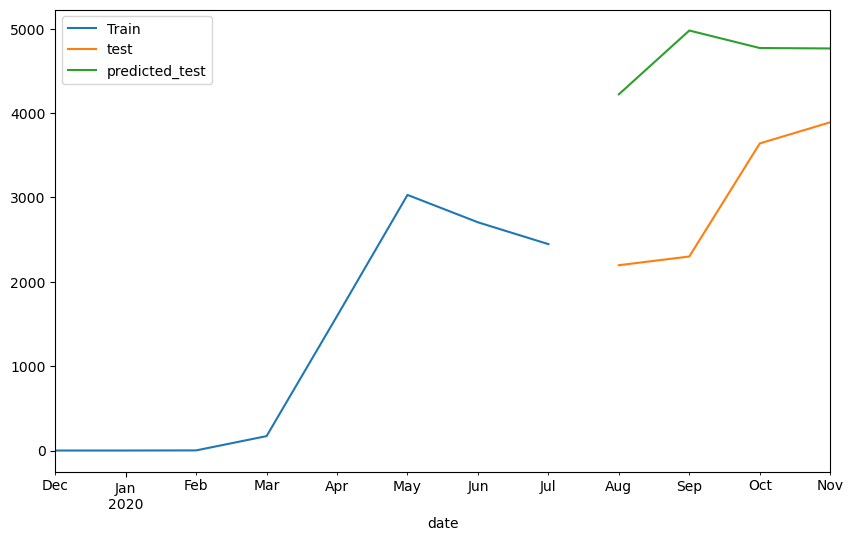

In [173]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [174]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [175]:
np.sqrt(mean_squared_error(test, test_pred))

1825.3632742689533

In [176]:
Russia_Only.cases.mean(), np.sqrt(Russia_Only.cases.var())

(1831.5410655250682, 1456.085165891107)

In [177]:
final_model=ExponentialSmoothing(Russia_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

In [178]:
pred=final_model.forecast(5)

In [179]:
pred

2020-12-31    4298.946199
2021-01-31    4693.959712
2021-02-28    5107.640358
2021-03-31    5134.662504
2021-04-30    5575.853465
Freq: M, dtype: float64

<Axes: xlabel='date'>

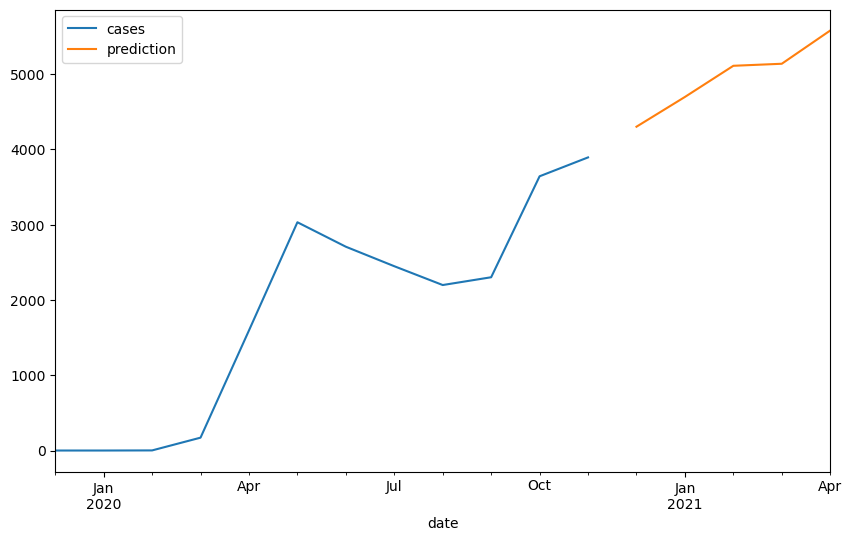

In [180]:
Russia_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### FRANCE ONLY

In [132]:
France_Only = df.loc[df['countriesAndTerritories'] == 'France']

In [133]:
France_Only=France_Only[['date','cases']]

In [134]:
France_Only.head()

,date,cases
19122,2020-11-26,16282.0
19123,2020-11-25,9155.0
19124,2020-11-24,4452.0
19125,2020-11-23,13157.0
19126,2020-11-22,17881.0


In [135]:
France_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 19122 to 19453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


<Axes: >

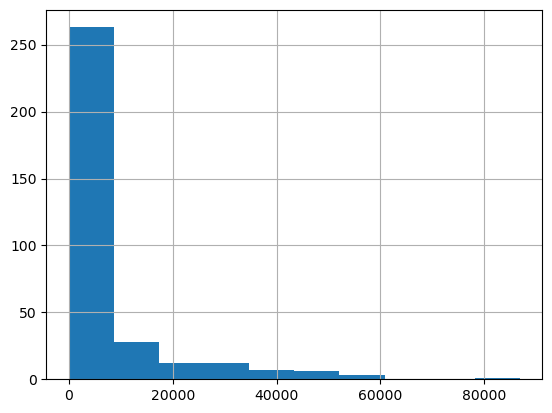

In [136]:
France_Only['cases'].hist()

In [137]:
FrcasesNorm = np.sqrt(France_Only['cases'])

In [138]:
France_Only['cases']= FrcasesNorm 

<Axes: >

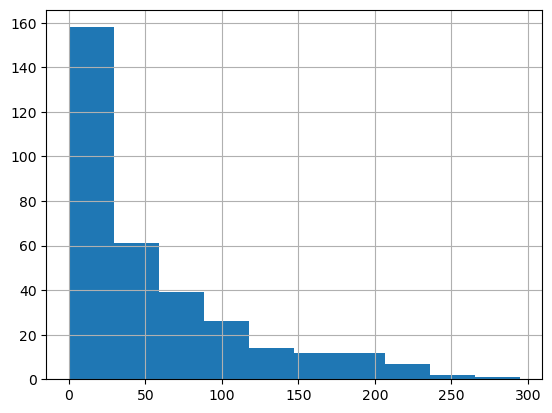

In [139]:
France_Only['cases'].hist()

In [140]:
France_Only=France_Only.groupby('date').sum()

In [141]:
France_Only

,cases
date,
2019-12-31,0.000000
2020-01-01,0.000000
2020-01-02,0.000000
2020-01-03,0.000000
2020-01-04,0.000000
...,...
2020-11-22,133.719856
2020-11-23,114.703967
2020-11-24,66.723309


In [142]:
France_Only=France_Only.resample(rule='M').median()

In [143]:
France_Only.head()

,cases
date,
2019-12-31,0.000000
2020-01-31,0.000000
2020-02-29,0.000000
2020-03-31,30.397368
2020-04-30,50.999035


<Axes: xlabel='date'>

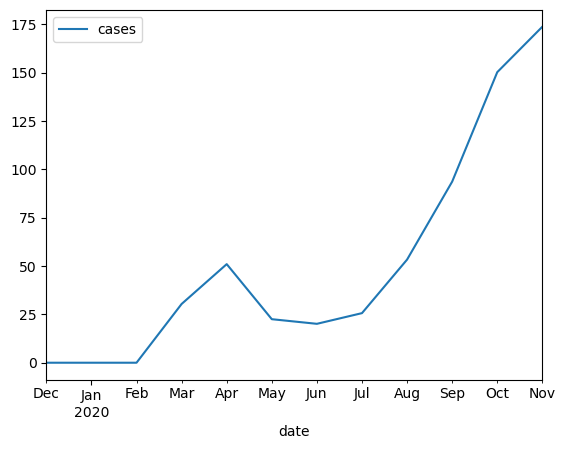

In [144]:
France_Only.plot()

In [145]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


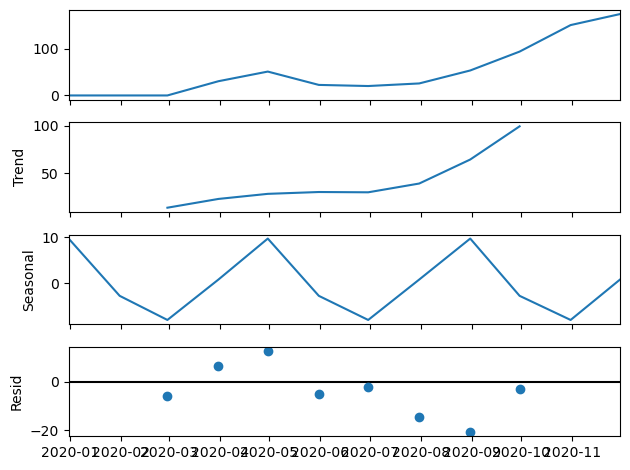

In [146]:
seasonal_decompose(France_Only, model='additive', period=4).plot();

In [147]:
len(France_Only)

12

In [148]:
train=France_Only[:8]
test=France_Only[8:]

In [149]:
train

,cases
date,
2019-12-31,0.000000
2020-01-31,0.000000
2020-02-29,0.000000
2020-03-31,30.397368
2020-04-30,50.999035
2020-05-31,22.516660
2020-06-30,20.124550
2020-07-31,25.651511


In [150]:
test

,cases
date,
2020-08-31,53.347915
2020-09-30,93.674285
2020-10-31,150.303027
2020-11-30,173.811662


In [151]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [152]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', damped_trend=True, seasonal_periods=4).fit()

In [153]:

test_pred=hwmodel.forecast(4)


In [154]:

test_pred

2020-08-31    56.765214
2020-09-30    36.270976
2020-10-31    30.072368
2020-11-30    44.032423
Freq: M, dtype: float64

<Axes: xlabel='date'>

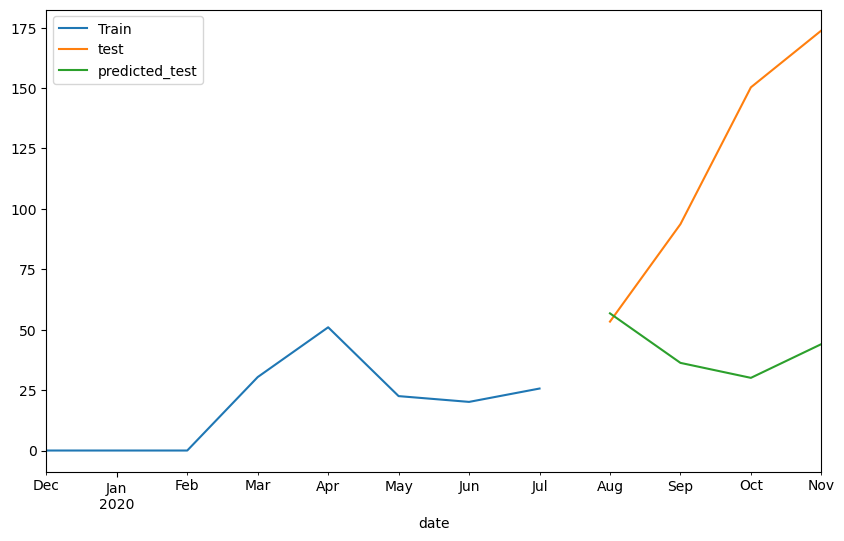

In [155]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [156]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [157]:
np.sqrt(mean_squared_error(test, test_pred))

93.01193504562171

In [158]:
France_Only.cases.mean(), np.sqrt(France_Only.cases.var())

(51.73550119892206, 58.30836500139106)

In [159]:
final_model=ExponentialSmoothing(France_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

In [160]:
pred=final_model.forecast(6)

In [161]:
pred

2020-12-31    197.961389
2021-01-31    201.908929
2021-02-28    219.987499
2021-03-31    239.797953
2021-04-30    263.947680
2021-05-31    267.895220
Freq: M, dtype: float64

<Axes: xlabel='date'>

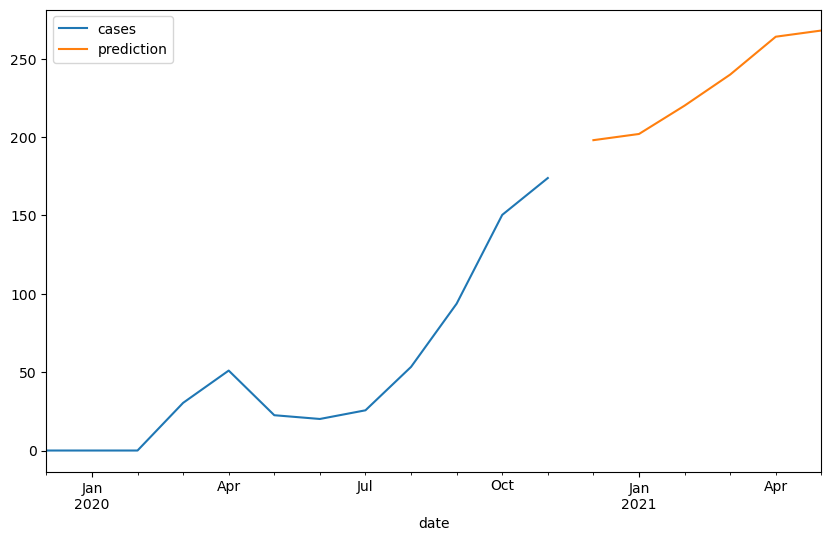

In [162]:
France_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### SPAIN ONLY

In [ ]:
Spain_Only = df.loc[df['countriesAndTerritories'] == 'Spain']

In [ ]:
Spain_Only=Spain_Only[['date','cases']]

In [ ]:
Spain_Only.head()

In [ ]:
Spain_Only.info()

In [ ]:
SpcasesNorm = np.sqrt(Spain_Only['cases'])

In [ ]:
Spain_Only['cases']= SpcasesNorm 

In [ ]:
Spain_Only['cases'].hist()

In [ ]:
Spain_Only=Spain_Only.groupby('date').sum()

In [ ]:
Spain_Only

In [ ]:
Spain_Only=Spain_Only.resample(rule='M').sum()

In [ ]:
Spain_Only.head()

In [ ]:
Spain_Only.plot()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
seasonal_decompose(Spain_Only, model='additive', period=4).plot();

In [ ]:
len(Spain_Only)

In [ ]:
train=Spain_Only[:8]
test=Spain_Only[8:]

In [ ]:
train

In [ ]:
test

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

In [ ]:

test_pred=hwmodel.forecast(4)


In [ ]:

test_pred

In [ ]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test, test_pred))

In [ ]:
Spain_Only.cases.mean(), np.sqrt(Spain_Only.cases.var())

In [ ]:
final_model=ExponentialSmoothing(Russia_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

In [ ]:
pred=final_model.forecast(5)

In [ ]:
pred

In [ ]:
Spain_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

In [ ]:
# Save DataFrame to a CSV file
#USA_only.to_csv('USA_only.csv', index=False)  # Set index=False to exclude the index column